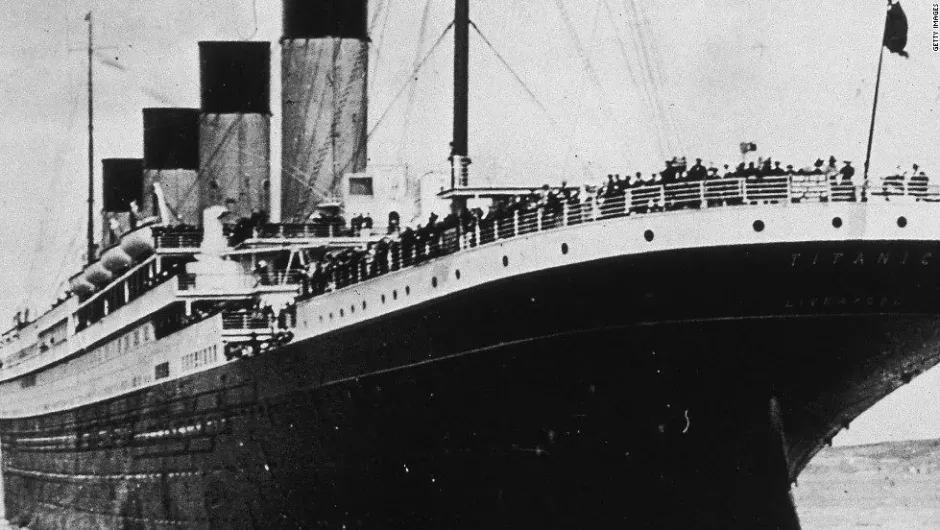

# <center>  Titanic Survival Prediction with ML </center>


This is the classic ML problem for beginners, as in https://www.kaggle.com/competitions/titanic/overview, from where one can also download the dataset.

Basically, it gives you a dataset with data about 700 of the passengers, like their ages, ticket fares, number of relatives on the ship, an so on. That dataset also includes a "Survived" column, stating whether they have managed to survive or not. 

The yalso provide a second dataset with the rest of hte passengers - a dataset identical in form to the first one, but without the "Survived" feature. 

Then, after examining and treating the first dataset, we feed it to a few machine learning algorithms, in order to train them. The aim is to make them predict the survival outcome for the rest of the passengers of the second datasaet.

This notebook contains my first attempts at this problem, as I'm beginning to study and learn Data Science.

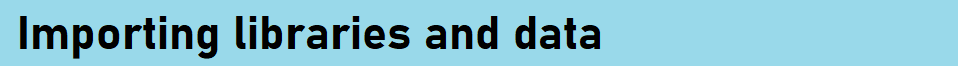

# Importing libraries:

In [464]:
# !pip install markupsafe==2.0.1 -- user


In [465]:
# !pip install pandas_profiling --user
# !pip install pandas_profiling==3.1.0  # assim funciona e não precisa de mais nada

In [466]:
from pandas_profiling import ProfileReport

In [467]:


import pandas as pd
from pandas_profiling import ProfileReport


import numpy as np

from tqdm import tqdm          #  progress bar

import seaborn as sns             # gráficos
import matplotlib.pyplot as plt
# to allow matplotlib to work when also using pandas_profiling:
%matplotlib inline           
import plotly.express as px      # para gráficos interativos

from sklearn.model_selection import train_test_split


from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier



from sklearn import metrics

from sklearn.metrics import confusion_matrix

from sklearn import preprocessing


# Importing data base:

### Here we're going to import both training and testing databases in one Data Frame, in order to process it all together. 

### From index 0 to 890 = train database. From 891 onwards = test database (with "Survived" = NaN)

In [468]:
data1 = pd.read_csv ("train.csv")

In [469]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [470]:
data2 = pd.read_csv ("test.csv")

In [471]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [472]:
data_raw = pd.concat([data1, data2], ignore_index=True)   # merging both databases

In [473]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


### Preliminary analysis:

In [474]:
data_raw[888:894]   # from index 891 onwards we have the test values, for which "Survived" = NaN

PassengerId  Survived  Pclass                                      Name  \
888          889       0.0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890       1.0       1                     Behr, Mr. Karl Howell   
890          891       0.0       3                       Dooley, Mr. Patrick   
891          892       NaN       3                          Kelly, Mr. James   
892          893       NaN       3          Wilkes, Mrs. James (Ellen Needs)   
893          894       NaN       2                 Myles, Mr. Thomas Francis   

        Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
888  female   NaN      1      2  W./C. 6607  23.4500   NaN        S  
889    male  26.0      0      0      111369  30.0000  C148        C  
890    male  32.0      0      0      370376   7.7500   NaN        Q  
891    male  34.5      0      0      330911   7.8292   NaN        Q  
892  female  47.0      1      0      363272   7.0000   NaN        S  
893    male  62.0      0      0      240276   9.6875   NaN        Q

In [475]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


We note that there are several NaN values on some columns.

In [476]:
data_raw.describe()

PassengerId    Survived       Pclass          Age        SibSp  \
count  1309.000000  891.000000  1309.000000  1046.000000  1309.000000   
mean    655.000000    0.383838     2.294882    29.881138     0.498854   
std     378.020061    0.486592     0.837836    14.413493     1.041658   
min       1.000000    0.000000     1.000000     0.170000     0.000000   
25%     328.000000    0.000000     2.000000    21.000000     0.000000   
50%     655.000000    0.000000     3.000000    28.000000     0.000000   
75%     982.000000    1.000000     3.000000    39.000000     1.000000   
max    1309.000000    1.000000     3.000000    80.000000     8.000000   

             Parch         Fare  
count  1309.000000  1308.000000  
mean      0.385027    33.295479  
std       0.865560    51.758668  
min       0.000000     0.000000  
25%       0.000000     7.895800  
50%       0.000000    14.454200  
75%       0.000000    31.275000  
max       9.000000   512.329200

# Defining functions for outliers analysis & graphics



#### Function for calculating the limits according to the quartile rule



In [477]:

# defining limites according to the quartile rule

def limites (coluna):
    q1 = coluna.quantile (0.25)    # first quartile (25%)
    q3 = coluna.quantile (0.75)    # third quartile (75%)

    amplitude = q3 - q1
    limite_inferior = q1 - 1.5 * amplitude   # lower limit
    limite_superior = q3 + 1.5 * amplitude    # upper limit
    return limite_inferior, limite_superior



#### Function for removing outliers 

In [478]:
# defining a function for removing outliers.
# the function returns a db without outliers, and exhibits the amount of removed rows 

def excluir_outliers (df, nome_coluna):
    qtde_linhas = len(df)
    lim_inf, lim_sup = limites (df[nome_coluna])
    df = df.loc [(df[nome_coluna] <= lim_sup) & (df[nome_coluna] >= lim_inf)]  # gets only the values inside the limits
    linhas_removidas =  qtde_linhas - len(df)
    return df, linhas_removidas

### Note:
#### In this notebook we have decided not to exclude any outliers. Hence, these functions were'nt used, but they are useful and should always be part of a project like this one.

# Now, defining functions for plotting graphs:

In [479]:
# defining a function for Boxplot graph:

def diagrama_caixa (coluna):
    fig, (ax1, ax2) = plt.subplots (1,2)    # for plotting 2 graph (in 1 row and 2 columns)
    fig.set_size_inches (15,5)
    sns.boxplot (x = coluna, ax = ax1)     # ax1 is the default axis, with all elements
    ax2.set_xlim (limites (coluna))    # calls the limits funtion to calculate upper/lower limits for the colums in order to define Z-axis
    sns.boxplot (x = coluna, ax = ax2)
    
    
# defining a function to plot histograms: 

def histograma (coluna):
    plt.figure (figsize = (15,5))    
    sns.histplot (coluna)   
    
def grafico_barra (coluna):
    plt.figure (figsize = (15,5)) 
    ax = sns.barplot (x=coluna.value_counts().index , y=coluna.value_counts()) # plots values against indexes 
    ax.set_xlim (limites(coluna))

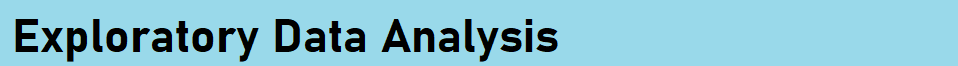

We will now analyze the dataset in order to obtain a greater understading of the problem, identify the features (columns of the dataset) that may have an important impact on the result, and to identify some treating/processing that we will have to carry on certain features so that they might be useful to us.


First thing we'll do is to take a general look at our databse:

In [480]:
profile = ProfileReport(data_raw, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The above overview shows that some features have many missing values, like "Cabin" and "Age". It also highlights some of the correlations between features, like "Pclass" and "Fare".

# Analyzing feature "Cabin"

In [481]:
pd.DataFrame(data_raw.Cabin).isna().value_counts()

Cabin
True     1014
False     295
dtype: int64

We have seen some approaches to this problem where they choose to keep the "Cabin" feature, and even fill the many NaN values using a machine learning algorithm. 

Here, however, we choose to <b>drop the "Cabin" feature </b> off the database, for the following reasons:
   - Although the cabin is related to survival, it is because some cabis are related to the passenger's class. But we  already have two features regarding that, namely "Pclass" and ticket "Fare".
   - With 1014 NaN values out of 1309, we don't think that this feature would be worthy of use.
    
We'll also drop columns "Name", "PassengerId" and "Ticket" (ticket number), as we figure won't impact the survival results.

## Thus, we'll drop some columns, and our new data base will be called data_base:

In [482]:
data_base = data_raw.drop (["Name", "Ticket", "PassengerId", "Cabin"], axis=1)    # dropping features from the db

## Examining the correlations between columns

In [483]:
correlation = data_raw.corr()  


<AxesSubplot:>

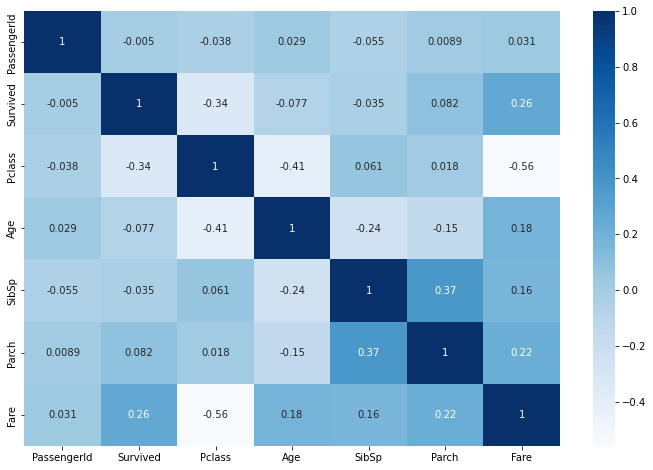

In [484]:
# sns.heatmap(correlation, 
#         xticklabels=correlation.columns,
#         yticklabels=correlation.columns, color = Greens)

plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot = True, cmap = "Blues")


We note, as observed beforme, that there is appreciable correlation between Parch and SibSp, and between Fare and Pclass (this one is negative, because high fees are from class 1 (1st class), and low fees are from class 3 (3rd class)).

Maybe an approach would be to make only one column out of Pclass and SibSp. But for now we'll keep the mas they are.

## Analyzing column "Sex"

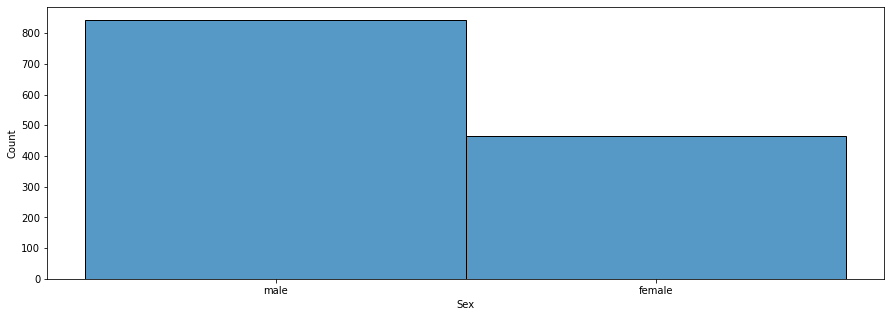

In [485]:
histograma(data_base.Sex)

We can see the majority of the passengers were male.

In [486]:
grafico = px.histogram(data_base[0:890], x="Sex", color="Survived", color_discrete_map={0: "red", 1: "blue"}, width=400, title = "Titanic survivors by Sex")
# etapa 2: exibir o gráfico
grafico.show()

We can see that most of the men died, and most of the women survived.

## Analyzing column "Age"

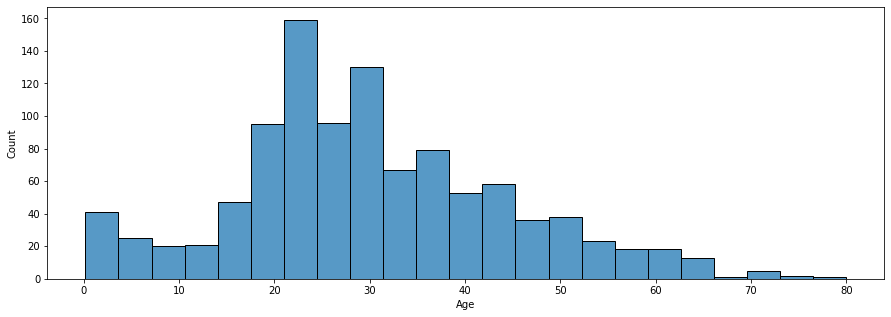

In [487]:
histograma(data_base.Age)

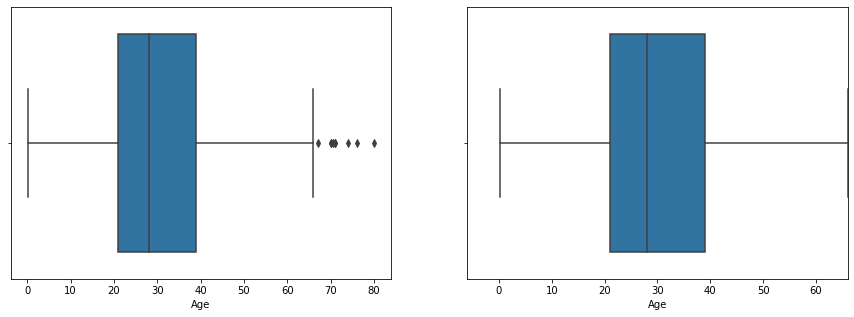

In [488]:
diagrama_caixa(data_base.Age)

We note the presence of several outliers, with ages higher than the limits set using the quartile rule. We'll have to decide later on whether we'll keep them or remove them.

In [489]:
data_base.Age.isna().value_counts()  # checking how many missing values there are on the "Age" column

False    1046
True      263
Name: Age, dtype: int64

As seen bedore, there are 263 missing Age values. This will have to be dealt with later. We will try to predict the missing age values using a machine learning algorithm.

In [490]:
# stage 1: creating graph
grafico = px.histogram(data_base[0:890], x="Age", color="Survived", color_discrete_map={0: "red", 1: "blue"}, 
                       width=1000, title = "Titanic survivors by Age",barmode="group")
# stage 2: exhibiting graph
grafico.show()

The above graph shows survival according to passengers' age. We can see the survival rates were high among young children, but low among adults.

In [491]:
aux = data_base.loc[data_base["Age"] >= 65]   # getting only those rows with age >= 65

In [492]:
len(aux)                                      # there were 13 rows like that

13

<AxesSubplot:>

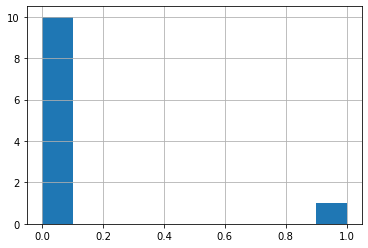

In [493]:
aux.Survived.hist()                           # from those 13, most didn't survive ("Survived"=0)

We can see that there were 13 people with age >= 65, of which the majority died.

So, despite being few individuals, we'll choose to keep those outliers, because we figure that a high age is an important feature that might impact survival rates.

## Sunburst graph

This kind of interactive graph is very nice. Here we can see Sex and Pclass variables against survival rates. Click on a segment of the graph to expand it.
The center disk is Survived, the middle ring is Sex, and the outer ring, Pclass.

In [494]:
px.sunburst(data_frame=data_base[0:890], path = ["Survived","Sex", "Pclass"] )
# 
# px.sunburst(data_frame=data_base, title="Titanic Survivors",  path = ["Survived", "Sex", "Pclass"], height=800)

And below, Pclass, Survived and Sex.

In [495]:
px.sunburst(data_frame=data_base[0:890], path = ["Pclass", "Survived","Sex"], height=600 )

From the above graph we see that most passengers from 3rd class (in blue) died (Survival = 0), and most from the 1st class (red) survived (Survival = 1). And for 2nd class (green) it was 50/50

## Analyzing "SibSp"

This is the number of siblings/spouses aboard

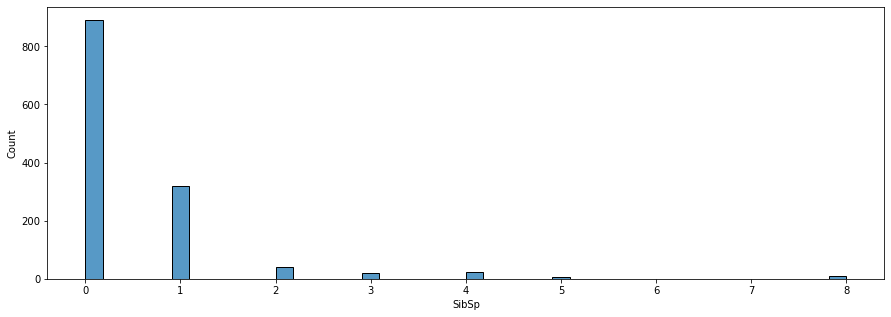

In [496]:
histograma (data_base.SibSp)

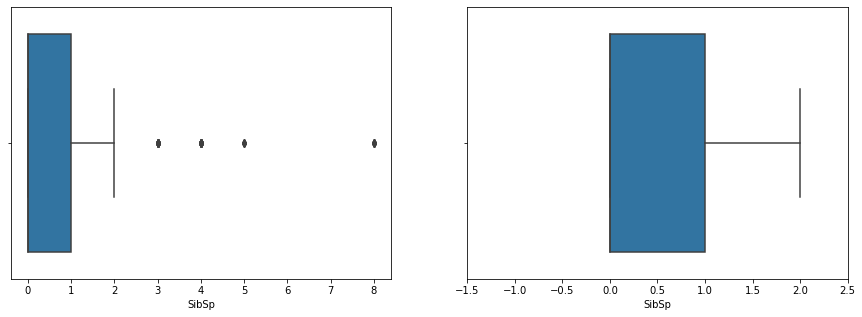

In [497]:
diagrama_caixa (data_base.SibSp)

In [498]:
# data_base, lr = excluir_outliers(data_base, "SibSp")
# print (f"Foram removidas {lr} linhas.")

We can see most people travelled alone, and a considerable amount with 1 spouse/sibling

## Analyzing "Parch"

This is the number of parents and children aboard

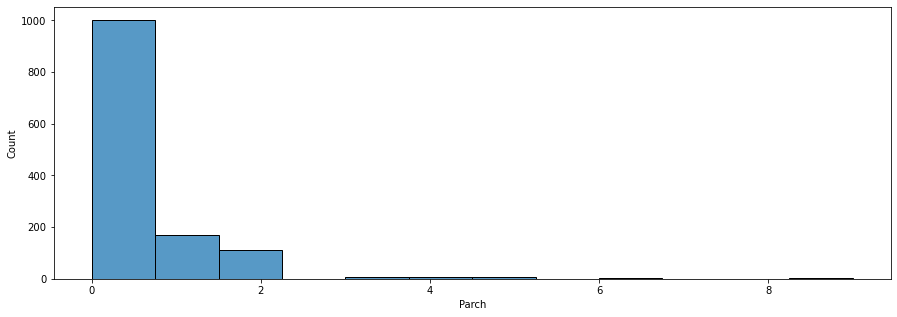

In [499]:
histograma (data_base.Parch)

Again, most passengers travelled alone (no parent/children).

## Analyzing "Pclass"

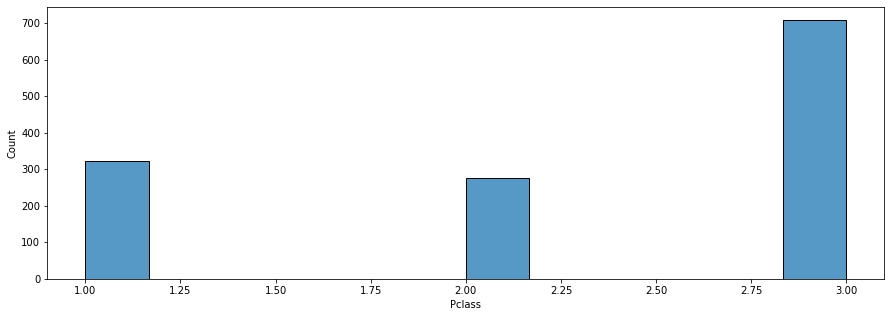

In [500]:
histograma(data_base.Pclass)

We see that most of the passengers were on 3rd class.

In [501]:
# etapa 1: criar o gráfico
grafico = px.histogram(data_base[0:890], x="Pclass", color="Survived", color_discrete_map={0: "red", 1: "blue"}, 
                       width=500, title = "Titanic survivors by Pclass", barmode="group")
# etapa 2: exibir o gráfico
grafico.show()

Here we notice that most of the people from 1st class has survived, and most from the 3rd class hasn't.

## Analyzing "Fare"

This is the ticket price.

In [502]:
data_base.Fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [503]:
data_base[data_base.Fare == 0]
# data_base[data_base.Fare == 0]["Survived"] == 1

Survived  Pclass   Sex   Age  SibSp  Parch  Fare Embarked
179        0.0       3  male  36.0      0      0   0.0        S
263        0.0       1  male  40.0      0      0   0.0        S
271        1.0       3  male  25.0      0      0   0.0        S
277        0.0       2  male   NaN      0      0   0.0        S
302        0.0       3  male  19.0      0      0   0.0        S
413        0.0       2  male   NaN      0      0   0.0        S
466        0.0       2  male   NaN      0      0   0.0        S
481        0.0       2  male   NaN      0      0   0.0        S
597        0.0       3  male  49.0      0      0   0.0        S
633        0.0       1  male   NaN      0      0   0.0        S
674        0.0       2  male   NaN      0      0   0.0        S
732        0.0       2  male   NaN      0      0   0.0        S
806        0.0       1  male  39.0      0      0   0.0        S
815        0.0       1  male   NaN      0      0   0.0        S
822        0.0       1  male  38.0      0      0   0.0        S
1157       NaN       1  male   NaN      0      0   0.0        S
1263       NaN       1  male  49.0      0      0   0.0        S

We notice that there are many Zero values for Fare. 

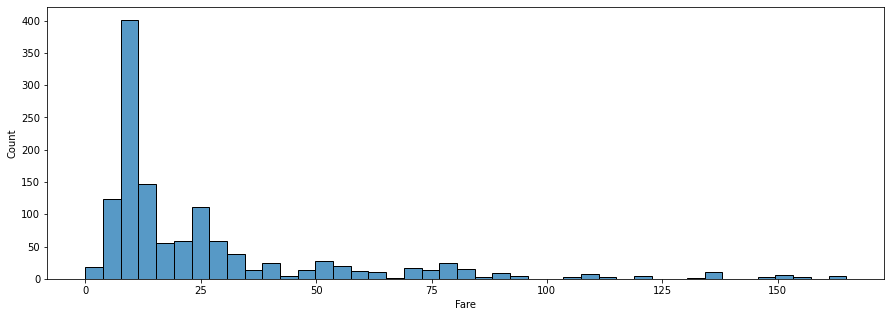

In [504]:
histograma (data_base[data_base.Fare < 200].Fare)

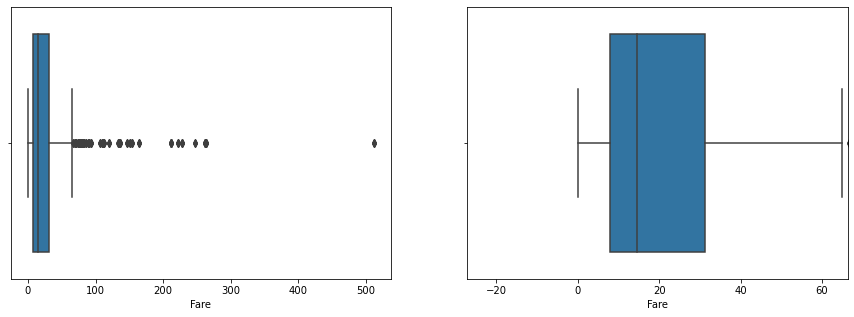

In [505]:
diagrama_caixa (data_base.Fare)

In [506]:
# etapa 1: criar o gráfico
grafico = px.histogram(data_base[0:890], x="Fare", color="Survived", color_discrete_map={0: "red", 1: "blue"}, 
                       width=1000, title = "Titanic survivors by Fare")
# etapa 2: exibir o gráfico
grafico.show()

Again, the above graph shows that the lowest ticket fares are related to a smaller survival rate.

Here we could remove the outliers, but we choose not to do so. Instead, we will later classify "Fare" in categories.

In [507]:
# data_base, lr = excluir_outliers(data_base, "Fare")
# print (f"Foram removidas {lr} linhas.")

In [508]:
# # etapa 1: criar o gráfico
# grafico = px.histogram(data_base, x="Fare", color="Survived", color_discrete_map={0: "red", 1: "blue"}, 
#                        width=1000, title = "Titanic survivors by Fare")
# # etapa 2: exibir o gráfico
# grafico.show()

# Analyzing Embarked

Passengers embarked at three places: S, C and O (see data explanation on the beginning of this notebook)

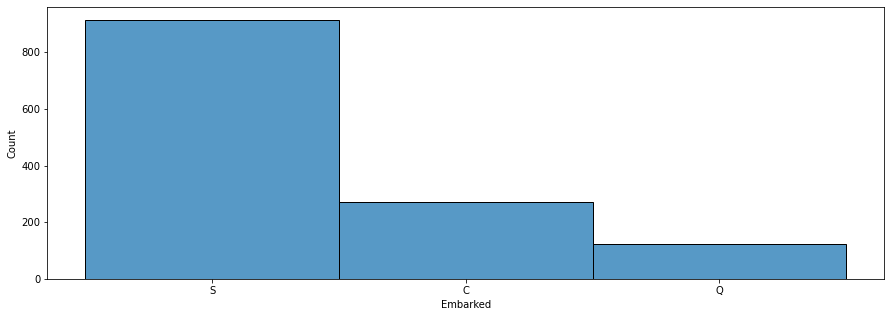

In [510]:
histograma(data_base.Embarked)

In [511]:
data_base.Embarked.isna().value_counts()

False    1307
True        2
Name: Embarked, dtype: int64

There are 2 NaN values on the "Fare" feature. We will fill them with the most common value, "S".

In [512]:
data_base.Embarked = data_base.Embarked.fillna("S")   # We fill the 2 empty Embarked values with the most common value, "S".

In [513]:
data_base.Embarked.isna().value_counts()

False    1309
Name: Embarked, dtype: int64



Although we've seen some people claiming that the "Embarked" feature has some impact on the Survival feature, we think that this is because it is related to Pclass or Fare.

In [514]:
# step 1: creating the graph
grafico = px.histogram(data_base[0:890], x="Embarked", color="Survived", color_discrete_map={0: "red", 1: "blue"}, 
                       width=1000, title = "Titanic survivors by Embarked")
# setp 2: exhibitting the graph
grafico.show()

In [515]:
# step 1: creating the graph
grafico = px.histogram(data_base[0:890], x="Embarked",color="Pclass", color_discrete_map={0: "red", 1: "blue"}, 
                       width=1000, title = "Titanic survivors by Embarked")
# setp 2: exhibitting the graph
grafico.show()

We notice from the above graph that most of the people who emarked at point C survived, but most of them were from 1st class, so it's related to Pclass.

# Sunburst graphics

In [516]:
px.sunburst(data_frame=data_base[0:889], title="Titanic Survivors",  path = ["Embarked", "Survived", "Pclass"], height=700)

#### We choose to remove the Embarked column.

In [517]:
data_base = data_base.drop ("Embarked", axis=1)    # removing the feature "Embarked"

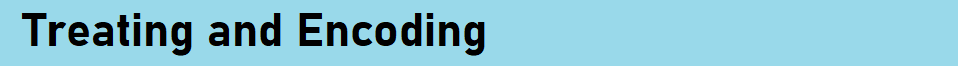

## Column "Age":

In [518]:
# Column Age:
data_base.Age.describe()


count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [520]:
data_base.Age.isna().value_counts()   # Age has 263 empty values

False    1046
True      263
Name: Age, dtype: int64

We tried to fill the mepty values on the "Age" column with the column's mean value, but it didn't improve the results, actually worsened then. 

In [521]:
# data_base["Age"] = data_base.Age.fillna(data_base.Age.mean())

# So we've decided to  fill NaN values by employing a Machine Learning algorithm to predict the Age values, using as train values the rows with known Age. This will be done after treating the other columns.

## We think this approach is better than to fill the many NaN values with the mean or mode.

<AxesSubplot:>

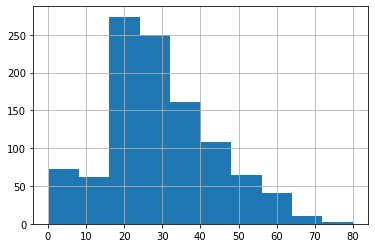

In [523]:
data_base.Age.hist()

## Treating Column "Fare":

In [524]:
data_base.Fare.isna().value_counts()

False    1308
True        1
Name: Fare, dtype: int64

"Fare" has only 1 NaN value, we will fill it with the column's mean value.

In [525]:
data_base["Fare"] = data_base.Fare.fillna(data_base.Fare.mean())  # filling the only Nan value of Fare with the column mean value.

## Attempt 1) Separate Fare in categories

We separate Fare values in 5 categories:
-    from 0 to 2.5,
-    from 2.5 to 17.5,
-    from 17.5 to 37.5,
-    from 37.5 to 85
-    over 85

In [526]:
# etapa 1: criar o gráfico
grafico = px.histogram(data_base[0:890][data_base.Fare<150], x="Fare", color="Survived", color_discrete_map={0: "red", 1: "blue"}, 
                       width=1000, title = "Titanic survivors by Fare")
# etapa 2: exibir o gráfico
grafico.show()

C:\Users\zoppo\AppData\Local\Temp/ipykernel_22220/2138493473.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [527]:
for indice in data_base.index:
    atual = data_base.loc[indice, "Fare"]
    if atual < 2.5:
        data_base.loc[indice, "Fare"] = 0
    elif atual < 17.5:
        data_base.loc[indice, "Fare"] = 1
    elif atual < 37.5:
        data_base.loc[indice, "Fare"] = 2
    elif atual < 85:
        data_base.loc[indice, "Fare"] = 3
    else:
        data_base.loc[indice, "Fare"] = 4

In [528]:
data_base.Fare.describe()

count    1309.000000
mean        1.720397
std         0.983684
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: Fare, dtype: float64

## Treating "Sex":  Obtaining dummy columns for "Sex"

Dummy columns are columns that represent a categories feature. In this case, instead of having a "Sex" column with 0/1 for male/female, we make 2 columns, 1 for Sex_female and the other for Sex_male, to be filled with 1 or zero. This may help the ML algorithms, in the sense that they won't reason that having "1" is someway "better" than having a "0".

In [529]:
data_base = pd.get_dummies(data=data_base, columns = ["Sex"])     # creates 2 dummy columns, for Sex_female and Sex-male

In [531]:
data_base.head()

Survived  Pclass   Age  SibSp  Parch  Fare  Sex_female  Sex_male
0       0.0       3  22.0      1      0   1.0           0         1
1       1.0       1  38.0      1      0   3.0           1         0
2       1.0       3  26.0      0      0   1.0           1         0
3       1.0       1  35.0      1      0   3.0           1         0
4       0.0       3  35.0      0      0   1.0           0         1

## Now we create a new column/feature, "Relatives", from the sum of "Parch" and "SibSp", since they are both related to the amount of relatives and highly correlated.

Then we drop "Parch" and "SibSp", making one column out of two. 


In [532]:
data_base["Relatives"] = (data_base.Parch + data_base.SibSp)
data_base = data_base.drop(["Parch", "SibSp"], axis=1)

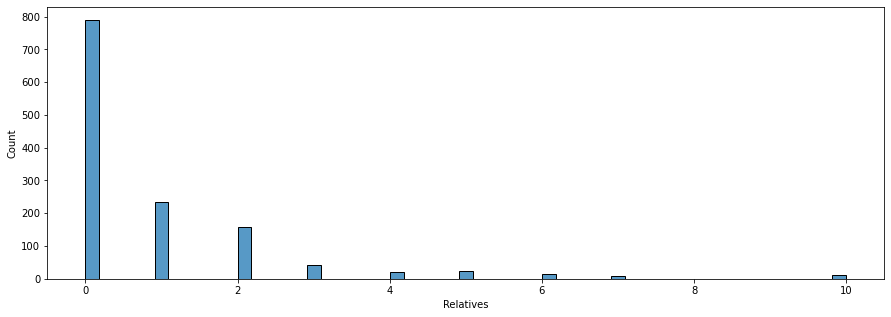

In [533]:
histograma(data_base.Relatives)

<AxesSubplot:>

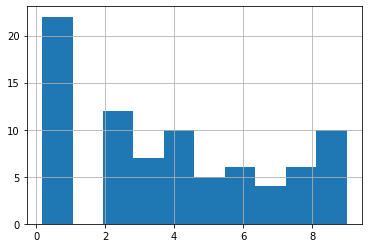

In [534]:
data_raw.Age[data_raw.Age<10].hist()

# -----------------------------------    -----------------------------------  -----------------------------------  -----------------------------------  -----------------------------------  -----------------------------------  -----------------------------------  -----------------------------------  -----------------------------------

# ML model for predicting Age

Here we employ a ML model for filling the 263 NaN values on the Age column.
For that we will use, as training database, the complete database (including the test base for later predicting its "survival" feature), that is, all rows with KNOWN value of Age. Then we'll train a few algorithms with the aim of predicting Age values for the rows which lack them.


In [536]:
data_base.sample(13)

Survived  Pclass   Age  Fare  Sex_female  Sex_male  Relatives
849        1.0       1   NaN   4.0           1         0          1
1200       NaN       3  45.0   1.0           1         0          1
486        1.0       1  35.0   4.0           1         0          1
350        0.0       3  23.0   1.0           0         1          0
562        0.0       2  28.0   1.0           0         1          0
67         0.0       3  19.0   1.0           0         1          0
965        NaN       1  35.0   4.0           1         0          0
1149       NaN       2  19.0   1.0           1         0          0
889        1.0       1  26.0   2.0           0         1          0
742        1.0       1  21.0   4.0           1         0          4
2          1.0       3  26.0   1.0           1         0          0
684        0.0       2  60.0   3.0           0         1          2
898        NaN       2  26.0   2.0           0         1          2

In [537]:
data_base.Age.isna().value_counts()

False    1046
True      263
Name: Age, dtype: int64

In [538]:
data_base.Age = data_base.Age.fillna (999)  # substituting NaN values for 999 to make handling easier

In [539]:
# Separating df/age with only the data with known age

age = data_base.Age[data_base.Age != 999]   # these are the known values of Age on the database (the target)
df = data_base[data_base.Age != 999]        
df = df.drop (["Age", "Survived"], axis=1)   # and this is the train database, with only the rows for which there is a known Age, but without the age column (and the survived column, which has NaNs)

In [540]:
df   # no Age column nor Survived column

Pclass  Fare  Sex_female  Sex_male  Relatives
0          3   1.0           0         1          1
1          1   3.0           1         0          1
2          3   1.0           1         0          0
3          1   3.0           1         0          1
4          3   1.0           0         1          0
...      ...   ...         ...       ...        ...
1300       3   1.0           1         0          2
1302       1   4.0           1         0          1
1303       3   1.0           1         0          0
1305       1   4.0           1         0          0
1306       3   1.0           0         1          0

[1046 rows x 5 columns]

In [541]:
# separating train/test variables

df_train, df_test, age_train, age_test = train_test_split(df, age, test_size=0.2, random_state=1)

# here we randomly divide the created dataset (only with known age) in a train set (80% of the db) and a test set (the other 20%)

In [542]:
# importing methods for metrics (avaliation):


from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

# Defining function for calculating the  r^2 and RSME metrics:

def avaliar_modelo (nome_modelo, y_teste, previsao):
    r2 = r2_score(y_teste, previsao)
    RSME = np.sqrt (mean_squared_error(y_teste, previsao))
    return f"Modelo: {nome_modelo}: \nR²: {r2:.2%}\nRSME: {RSME:.2f}"


### Creating the ML models
This age prediction is a regression problem, the target is a continuous variable. We must choose some regression algorithms.

In [543]:
# Creating the instances for the regression models:

model_lr = LinearRegression()
model_rf = RandomForestRegressor(n_estimators=300, max_depth=4)
model_et = ExtraTreesRegressor(max_depth=4)

models = {"RandomForest": model_rf, "RegressaoLinear": model_lr, "ExtraTrees": model_et}




### Training

In [544]:
# training

pbar = tqdm (total = len(models), colour = "red")    # progress bar
pbar.clear()

for model_name, model in models.items():
    # training:
    model.fit (df_train, age_train )
    pbar.update()

pbar.close()

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.84it/s]


In [545]:
df_train

Pclass  Fare  Sex_female  Sex_male  Relatives
866        2   1.0           1         0          1
392        3   1.0           0         1          2
382        3   1.0           0         1          0
1259       1   3.0           1         0          1
104        3   1.0           0         1          2
...      ...   ...         ...       ...        ...
1207       1   4.0           0         1          1
1057       1   3.0           0         1          0
892        3   1.0           1         0          1
1130       1   4.0           1         0          1
291        1   4.0           1         0          1

[836 rows x 5 columns]

In [546]:
df_test

Pclass  Fare  Sex_female  Sex_male  Relatives
49         3   2.0           1         0          1
1093       1   4.0           0         1          1
757        2   1.0           0         1          0
165        3   2.0           0         1          2
349        3   1.0           0         1          0
...      ...   ...         ...       ...        ...
831        2   2.0           0         1          2
789        1   3.0           0         1          0
1302       1   4.0           1         0          1
572        1   2.0           0         1          0
1265       1   3.0           1         0          2

[210 rows x 5 columns]

### Testing

RandomForest ------------------------------------------
Modelo: RandomForest: 
R²: 25.77%
RSME: 13.81
------------------------------------------------------------------------------------------
RegressaoLinear ------------------------------------------
Modelo: RegressaoLinear: 
R²: 21.79%
RSME: 14.17
------------------------------------------------------------------------------------------
ExtraTrees ------------------------------------------
Modelo: ExtraTrees: 
R²: 23.29%
RSME: 14.03
------------------------------------------------------------------------------------------


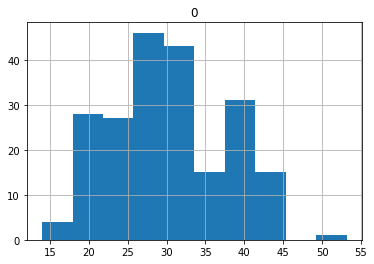

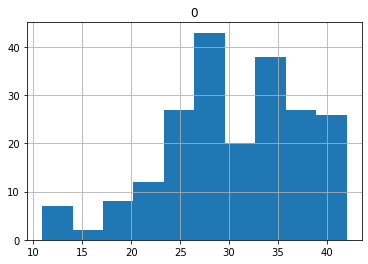

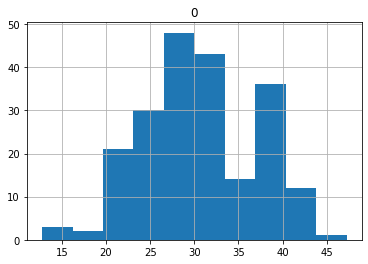

In [547]:
 # testing using  classification_reports:
    
for model_name, model in models.items():
    print (model_name + " ------------------------------------------")
    age_prediction = model.predict (df_test)
    
    pd.DataFrame(age_prediction).hist();
    print (avaliar_modelo(model_name, age_test, age_prediction))
    print ("---" * 30)



None of the metrics results is particularly good, but the histogram of the ages predicted by Random Forest Regressor is more similar to the Age histogram of the test database (below), so we'll choose the Random Forest model.

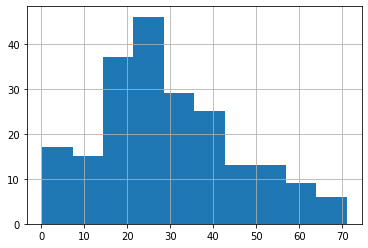

In [548]:
age_test.hist();

In [549]:
data_base.sample(13)

Survived  Pclass    Age  Fare  Sex_female  Sex_male  Relatives
352        0.0       3   15.0   1.0           0         1          2
285        0.0       3   33.0   1.0           0         1          0
240        0.0       3  999.0   1.0           1         0          1
1231       NaN       2   18.0   1.0           0         1          0
134        0.0       2   25.0   1.0           0         1          0
862        1.0       1   48.0   2.0           1         0          0
918        NaN       3   22.5   1.0           0         1          0
611        0.0       3  999.0   1.0           0         1          0
853        1.0       1   16.0   3.0           1         0          1
925        NaN       1   30.0   3.0           0         1          1
1018       NaN       3  999.0   2.0           1         0          2
191        0.0       2   19.0   1.0           0         1          0
861        0.0       2   21.0   1.0           0         1          1

### Filling NaNs with age predicted by the ML model

In [550]:
# using the random forest model

for i, (surv, pcl, age, far, sf, sm, rel )in enumerate(data_base.values):
    # print (surv, pcl, age, far, sf, sm, rel)
    entry = pd.DataFrame([pcl, far, sf, sm, rel]).transpose()
    entry.columns = [ "Pclass", "Fare", "Sex_female", "Sex_male", "Relatives"]
    
    if age == 999:
        age_predict = model_rf.predict(entry)[0]   # using the random_forest model
        data_base.iloc[i, 2] = age_predict
        




In [551]:
data_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      1309 non-null   int64  
 2   Age         1309 non-null   float64
 3   Fare        1309 non-null   float64
 4   Sex_female  1309 non-null   uint8  
 5   Sex_male    1309 non-null   uint8  
 6   Relatives   1309 non-null   int64  
dtypes: float64(3), int64(2), uint8(2)
memory usage: 53.8 KB


<AxesSubplot:>

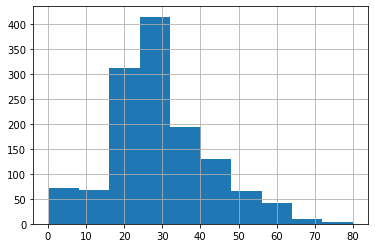

In [553]:
data_base.Age.hist()

# Try 2) Categorize Ages in 5 groups


        

It may help the ML models if Age is categorized in 4 or 5 groups, instead of leaving it as a continuum of integers

In [554]:
for indice in data_base.index:
    atual = data_base.loc[indice, "Age"]
    if atual < 10:
        data_base.loc[indice, "Age"] = 1
    elif atual < 35:
        data_base.loc[indice, "Age"] = 2
    elif atual < 50:
        data_base.loc[indice, "Age"] = 3
    elif atual < 65:
        data_base.loc[indice, "Age"] = 4
        
    else:
        data_base.loc[indice, "Age"] = 5        
        

<AxesSubplot:>

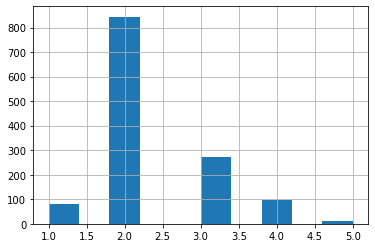

In [555]:
data_base.Age.hist()

## Getting dummy columns for "Age", "Fare", "Relatives" and "Pclass":

In [317]:
data_base = pd.get_dummies (data=data_base, columns=["Age", "Fare", "Relatives", "Pclass"])


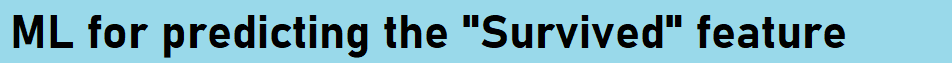

# Here starts the modeling phase

# Creating the models

This is a classification problem (the target has only 2 possible values, 0 or 1). We must choose some classification algorithms, lie the ones below.

In [318]:

# This is a classification problem (1 or 0). We must choose classification algorithms.
# We'll try the following models: Random Forest Classifier, Logistic Regression, Gaussian Naive Bayes an K-Nearest Neighbors.



model_rfc = RandomForestClassifier(n_estimators=220, bootstrap=True, max_depth=9)      # n_estimators = numero de árvores
                                                                        # bootstrap=False = usa todos os dados pra cada árvore

# model_lr = LogisticRegression()
model_dtc = DecisionTreeClassifier(max_depth=9)
# model_svc = SVC()

model_gnb = GaussianNB()

model_knn = KNeighborsClassifier()





models = {"RandomForestClassifier": model_rfc,  "DecisionTreeClassifier": model_dtc, "GaussinaNaiveBayes": model_gnb,
          "K-NearestNeighborsClassifier": model_knn}





# Scaling

Some ML models work better when the data is scaled, that is, the range of values is in the range [-1, 1] or [0, 1].
We would typically use a function to do the scaling. 

#### Here, though, we won't need to scale because we have transformed all the features in dummies, hence all values are already 0 or 1.

In [320]:
#  Standard Scaler    - scaling not used in this project.



# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# data_base[['Age', 'Fare']] = sc.fit_transform(data_base[['Age', 'Fare']])    # We could apply saling here

# Selecting the database for training and separating in X and y

In [321]:
y = data_base[0:891].Survived      # y is the Survived feature of the first 890 rows (the ones that have a Survivd feature)
X = data_base[0:891].drop("Survived", axis=1)   # X is the rest of the columns for the same rows


# Separating in X_train, X_test

In [322]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [323]:
X_train.describe()

Sex_female    Sex_male     Age_1.0     Age_2.0     Age_3.0     Age_4.0  \
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000   
mean     0.349719    0.650281    0.068820    0.203652    0.693820    0.030899   
std      0.477216    0.477216    0.253326    0.402996    0.461229    0.173165   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    1.000000    0.000000    0.000000    1.000000    0.000000   
75%      1.000000    1.000000    0.000000    0.000000    1.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

          Age_5.0    Fare_0.0    Fare_1.0    Fare_2.0  ...  Relatives_2  \
count  712.000000  712.000000  712.000000  712.000000  ...   712.000000   
mean     0.002809    0.016854    0.539326    0.230337  ...     0.119382   
std      0.052963    0.128815    0.498801    0.421345  ...     0.324465   
min      0.000000    0.000000    0.000000    0.000000  ...     0.000000   
25%      0.000000    0.000000    0.000000    0.000000  ...     0.000000   
50%      0.000000    0.000000    1.000000    0.000000  ...     0.000000   
75%      0.000000    0.000000    1.000000    0.000000  ...     0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...     1.000000   

       Relatives_3  Relatives_4  Relatives_5  Relatives_6  Relatives_7  \
count   712.000000   712.000000   712.000000   712.000000   712.000000   
mean      0.030899     0.019663     0.022472     0.009831     0.005618   
std       0.173165     0.138937     0.148317     0.098734     0.074795   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       Relatives_10    Pclass_1    Pclass_2    Pclass_3  
count    712.000000  712.000000  712.000000  712.000000  
mean       0.005618    0.244382    0.210674    0.544944  
std        0.074795    0.430022    0.408074    0.498326  
min        0.000000    0.000000    0.000000    0.000000  
25%        0.000000    0.000000    0.000000    0.000000  
50%        0.000000    0.000000    0.000000    1.000000  
75%        0.000000    0.000000    0.000000    1.000000  
max        1.000000    1.000000    1.000000    1.000000  

[8 rows x 24 columns]

In [561]:
X_train.shape    # here X-train has 712 rows  #######################################################

(1098, 24)

# Imbalance treatment:

In this problem, the target variable set is imbalanced, that is, the amount of 0's and 's on the "Survived" column is not even: more people died than survived. And this imbalance may impact them ML models.
One of the ways of treating this kind of imbalance is to use undersampling methods (where some rows with "Suvived"=0 would be removed) or oversampling (where some rows with "Survived"=1 woukd be created).
Here we will use an oversampling method. The amount of rows on the database increases.


In [325]:
data_raw.Survived.value_counts()     # Amount of "1"s on "Survived" on the 891 rows of the first dataset: 342

0.0    549
1.0    342
Name: Survived, dtype: int64

In [326]:
y_train.value_counts()         # Amount of "1"s on "Survived" on the 712 rows separated for training: 269

0.0    443
1.0    269
Name: Survived, dtype: int64

In [327]:
# importing library for oversampling 

from imblearn.over_sampling import SMOTE


In [328]:
X_train.shape   # here X_train has 712 rows.

(712, 24)

In [329]:
SMOTE = SMOTE()   #oversample
X_train, y_train = SMOTE.fit_resample(X_train, y_train)

In [330]:
X_train.shape  # after oversampling, X_train has more rows.

(886, 24)

In [331]:
pd.DataFrame(y_train).value_counts()  

Survived
0.0         443
1.0         443
dtype: int64

Now the training database has an equal number of "1"s and "0"s.

# Training the models using the separated "train" dataset

In [334]:
pbar = tqdm (total = len(models), colour = "blue")
pbar.clear()

for model_name, model in models.items():
    # training:
    model.fit (X_train, y_train )
    pbar.update()

pbar.close()

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 11.25it/s]


## Testing the models, applying them to the separated "test" dataset

In [335]:
 # testing using  classification_reports:
    
for model_name, model in models.items():
    print (model_name + " ------------------------------------------")
    prediction = model.predict (X_test)
    numprev =  [i for i in prediction if i ==1]
    print (f"sroke1 = 1: {len(numprev)}")
    print (metrics.classification_report(y_test, prediction))
    print ("---" * 30)



RandomForestClassifier ------------------------------------------
sroke1 = 1: 71
              precision    recall  f1-score   support

         0.0       0.81      0.82      0.81       106
         1.0       0.73      0.71      0.72        73

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

------------------------------------------------------------------------------------------
DecisionTreeClassifier ------------------------------------------
sroke1 = 1: 72
              precision    recall  f1-score   support

         0.0       0.81      0.82      0.82       106
         1.0       0.74      0.73      0.73        73

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

------------------------------------------------------------------------------------------
Ga

Above there are a few relevant metrics, like Precision, Recall and F-1 Score. 
The Decision Tree Classifier is the model that appears to have the best results. 

In [336]:
y_test.value_counts()

0.0    106
1.0     73
Name: Survived, dtype: int64

In [337]:
X_train

Sex_female  Sex_male  Age_1.0  Age_2.0  Age_3.0  Age_4.0  Age_5.0  \
0             0         1        0        1        0        0        0   
1             1         0        0        0        1        0        0   
2             1         0        0        0        1        0        0   
3             0         1        0        1        0        0        0   
4             0         1        0        0        1        0        0   
..          ...       ...      ...      ...      ...      ...      ...   
881           1         0        0        0        1        0        0   
882           0        59        0        0        1        0        0   
883           1         0      222        0        0        0        0   
884           1         0        0        0        1        0        0   
885           1         0        0        0        1        0        0   

     Fare_0.0  Fare_1.0  Fare_2.0  ...  Relatives_2  Relatives_3  Relatives_4  \
0           0         0         1  ...            1            0            0   
1           0         0         0  ...            0            0            0   
2           0         1         0  ...            0            0            0   
3           0         0         0  ...            1            0            0   
4           0         1         0  ...            0            0            0   
..        ...       ...       ...  ...          ...          ...          ...   
881         0         1         0  ...            0            0            0   
882         0         0         0  ...            0            0            0   
883         0         0         1  ...            0          222            0   
884         0         0         0  ...            0            0            0   
885         0         0         0  ...            0            0            0   

     Relatives_5  Relatives_6  Relatives_7  Relatives_10  Pclass_1  Pclass_2  \
0              0            0            0             0         0         0   
1              0            0            0             0         1         0   
2              0            0            0             0         0         1   
3              0            0            0             0         0         1   
4              0            0            0             0         0         1   
..           ...          ...          ...           ...       ...       ...   
881            0            0            0             0         0         0   
882            0            0            0             0         1         0   
883            0            0            0             0         0         0   
884            0            0            0             0         1         0   
885            0            0            0             0         1         0   

     Pclass_3  
0           1  
1           0  
2           0  
3           0  
4           0  
..        ...  
881         1  
882         0  
883         1  
884         0  
885         0  

[886 rows x 24 columns]

# Impact Analysis

In [338]:
impacto_colunas = pd.DataFrame (model_dtc.feature_importances_, X_test.columns)  # gives the impact of each column for the dtc model

impacto_colunas.columns = ["impacto"]

impacto_colunas = impacto_colunas.sort_values(by = "impacto", ascending = False)



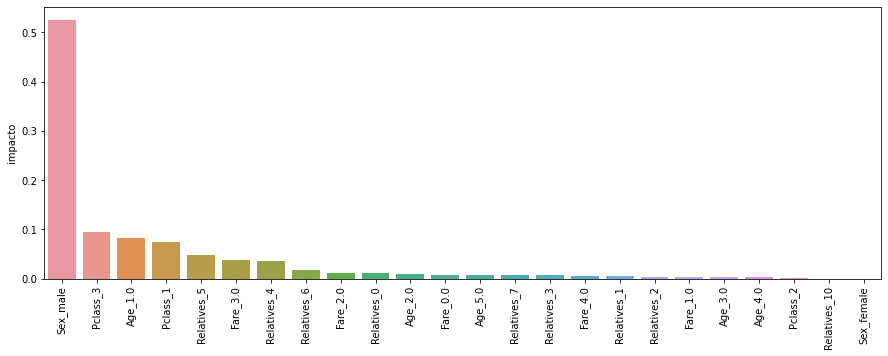

In [339]:

plt.figure (figsize = (15,5)) 
ax = sns.barplot (x=impacto_colunas[:32].index , y=impacto_colunas["impacto"][:32]) # plota os valores em função dos índices
ax.tick_params (axis="x", rotation = 90)
#ax.set_xlim (limites(coluna))

For the Decision Tree model, the most important feature by far for determining the "Survived" feature is "Sex".

# We'll choose the best model: in this case, the Decision Tree Classifier

# Getting the whole given data set do train the models again 

In [340]:
X_train = X
y_train = y

In [341]:
X_train.shape

(891, 24)

In [342]:
from imblearn.over_sampling import SMOTE
SMOTE = SMOTE()   #oversample
X_train, y_train = SMOTE.fit_resample(X_train, y_train)

In [343]:
X_train.shape

(1098, 24)

## Training the models again

In [344]:
pbar = tqdm (total = len(models), colour = "blue")
pbar.clear()

for model_name, model in models.items():
    # training:
    model.fit (X_train, y_train )
    pbar.update()

pbar.close()

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 13.05it/s]


## We can't assess the models anymore, since whe've used the whole dataset for training and haven't separated any part of it for testing.

### We'll directly use it to predict the Survival of the second database.

<hr style="height:10px">

# Selecting test data that the model will use to predict their "Survived" feature

In [345]:
test_data_base = data_base[891:]   # getting only the data from index 891 onwards, that doesn't have the "Survived" feature, to be predicted.

In [346]:
X_test_new = test_data_base.drop("Survived", axis=1)   # taking "Survived" off the setthat will be used as test dataset

# Getting a prediction for "Survived" for the second data set using the model that performed best on the training phase:

In [347]:
# model = model_rfc
# model = model_knn
model = model_dtc

# model_name = "K-nearest neighbors"
# model_name = "Random Forest Classifier"
model_name= "Decision Tree Classifier"

print (model_name + " ------------------------------------------")
prediction = model.predict (X_test_new)
  #  numprev =  [i for i in prediction if i ==1]
   # print (f"sroke1 = 1: {len(numprev)}")
  #  print (metrics.classification_report(y_test, prediction))
print ("---" * 30)

Decision Tree Classifier ------------------------------------------
------------------------------------------------------------------------------------------


# Assembling an answer to the problem

In [348]:
Answer = pd.DataFrame()

In [349]:
Answer["PassengerId"] = data_raw["PassengerId"][891:]

In [350]:
Answer["Survived"] = prediction

In [351]:
Answer

PassengerId  Survived
891           892       0.0
892           893       1.0
893           894       0.0
894           895       0.0
895           896       0.0
...           ...       ...
1304         1305       0.0
1305         1306       1.0
1306         1307       0.0
1307         1308       0.0
1308         1309       0.0

[418 rows x 2 columns]

In [352]:
Answer = Answer.astype("int32")   # Setting the answer to int in order to be correctly interpreted by kaggle engine

In [353]:
Answer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int32
 1   Survived     418 non-null    int32
dtypes: int32(2)
memory usage: 3.4 KB


## Saving the answer on a .csv file to submit to kaggle

In [354]:
Answer.to_csv("Titanic_Survivors_07.csv", index=False)

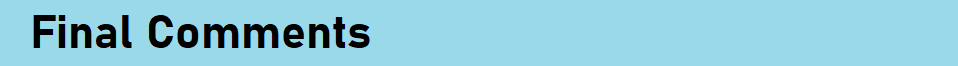



When submitting the answers obteined by means of this notebook to kaggle engine, we obtain a score from 0.758 to 0.767.
We've seen people obtain a score as high as 0.8, but right now we can't get more than 0.77 :)

Among other things, we've tried to make some features like Fare more Gaussian using Box-cox (it improved the Gaussian model a bit, but haven1't impacted the others much), remove outliers and other things.

Nest step is to study, explore and try the optimization of the hyperparameters of the ML models, using Grid Search. 

Still, this notebook is an account of things I'm studying and learning right now. Any comment or criticism would be appreciated! Thanx :)
